# Atividade 4: Regressão com database Diabetes

## 1) Explorando a base de dados.

In [2]:
#Aula 4: Atividade usando a base de dados Diabetes

#Importação da base de dados
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

#Mostrando itens da base de dados
diabetes.keys()

print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
#Visualização de dados em tabela

import pandas
tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head(10) #limitar às 10 primeiras amostras

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


## 2) O target da base de dados é a progressão da doença no período de 1 ano.

In [4]:
#Variavel dependente: Progressão da doença
tabela['Progressão'] = diabetes.target #Adicionando Coluna para o target (Varivel dependente)
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progressão
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


## 3) Abaixo mostramos a relação, de forma visual, das características(colunas) com o target(Progressão)

In [5]:
#Importação para uso de gráficos
import matplotlib.pyplot as plt

#Relação entre Progressão e Idade
plt.scatter(tabela.age, tabela.Progressão)
plt.xlabel('Idade')
plt.ylabel('Progressão da doença após um ano')
plt.show()

<Figure size 640x480 with 1 Axes>

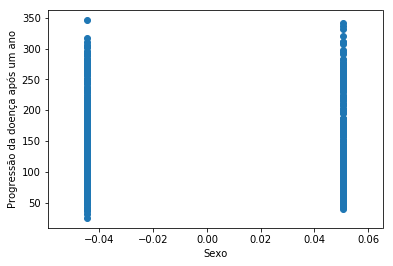

In [6]:
#Relação entre Progressão e Sexo
plt.scatter(tabela.sex, tabela.Progressão)
plt.xlabel('Sexo')
plt.ylabel('Progressão da doença após um ano')
plt.show()

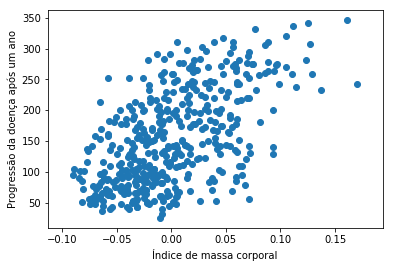

In [7]:
#Relação entre Progressão e o índice de massa corporal
plt.scatter(tabela.bmi, tabela.Progressão)
plt.xlabel('Índice de massa corporal')
plt.ylabel('Progressão da doença após um ano')
plt.show()

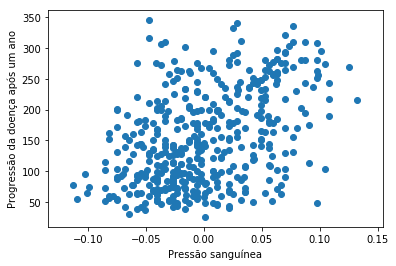

In [8]:
#Relação entre Progressão e pressão sanguínea
plt.scatter(tabela.bp, tabela.Progressão)
plt.xlabel('Pressão sanguínea')
plt.ylabel('Progressão da doença após um ano')
plt.show()

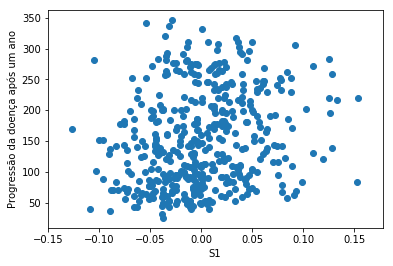

In [9]:
#Relação entre Progressão e s1
plt.scatter(tabela.s1, tabela.Progressão)
plt.xlabel('S1')
plt.ylabel('Progressão da doença após um ano')
plt.show()

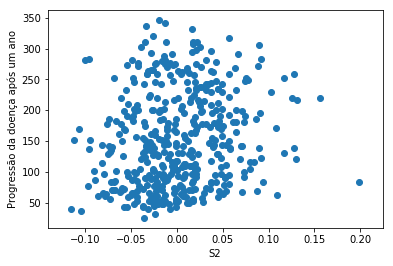

In [10]:
#Relação entre Progressão e s2
plt.scatter(tabela.s2, tabela.Progressão)
plt.xlabel('S2')
plt.ylabel('Progressão da doença após um ano')
plt.show()

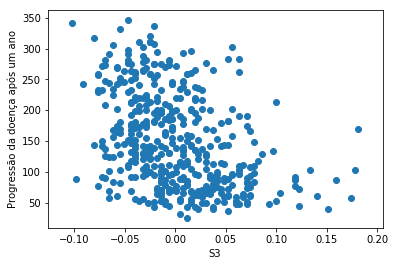

In [11]:
#Relação entre Progressão e s3
plt.scatter(tabela.s3, tabela.Progressão)
plt.xlabel('S3')
plt.ylabel('Progressão da doença após um ano')
plt.show()

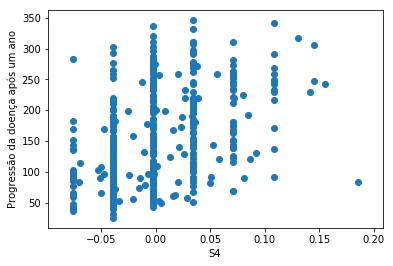

In [12]:
#Relação entre Progressão e s4
plt.scatter(tabela.s4, tabela.Progressão)
plt.xlabel('S4')
plt.ylabel('Progressão da doença após um ano')
plt.show()

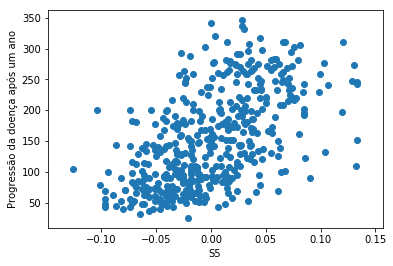

In [13]:
#Relação entre Progressão e s5
plt.scatter(tabela.s5, tabela.Progressão)
plt.xlabel('S5')
plt.ylabel('Progressão da doença após um ano')
plt.show()

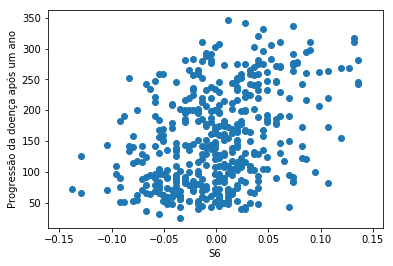

In [14]:
#Relação entre Progressão e s6
plt.scatter(tabela.s6, tabela.Progressão)
plt.xlabel('S6')
plt.ylabel('Progressão da doença após um ano')
plt.show()

## 4) Apenas com a forma gráfica, não é tão simples decidir quais caracteristicas devemos considerar para realizar o treinamento. Por isso usamos uma tabela de coorelação.

In [15]:
#Exibindo Correlação
tabela.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progressão
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


## 5) Vamos escolher as colunas que, em módulo, apresentam a maior correlação: bmi e s5. E uma coluna com correlação de sinal oposto com maior módulo: s3.

In [16]:
#Vetor de caracteristicas:
X = tabela[["bmi", "s5", "s3"]]
print(X)

          bmi        s5        s3
0    0.061696  0.019908 -0.043401
1   -0.051474 -0.068330  0.074412
2    0.044451  0.002864 -0.032356
3   -0.011595  0.022692 -0.036038
4   -0.036385 -0.031991  0.008142
5   -0.040696 -0.041180  0.041277
6   -0.047163 -0.062913  0.000779
7   -0.001895 -0.035817  0.022869
8    0.061696 -0.014956 -0.028674
9    0.039062  0.067736 -0.024993
10  -0.083808 -0.062913 -0.013948
11   0.017506 -0.096433 -0.065491
12  -0.028840 -0.030751  0.044958
13  -0.001895  0.038393 -0.002903
14  -0.025607 -0.031991  0.081775
15  -0.018062  0.036056 -0.039719
16   0.042296  0.052280  0.074412
17   0.012117  0.027368 -0.039719
18  -0.010517 -0.018118 -0.028674
19  -0.018062 -0.008944  0.037595
20  -0.056863 -0.011901  0.000779
21  -0.022373 -0.072128  0.015505
22  -0.004050 -0.061177  0.022869
23   0.060618  0.133599 -0.054446
24   0.035829 -0.025952 -0.006584
25  -0.012673  0.019199 -0.058127
26  -0.077342 -0.042572  0.026550
27   0.059541 -0.015998  0.011824
28  -0.021295 

In [17]:
#Separa dados de treinamento do modelo linear e dados para validação do modelo
#Inclui o modulo de regressão linear
from sklearn import linear_model

#Separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t = X[:-20]
X_v = X[-20:]

y_t = tabela["Progressão"][:-20]
y_v = tabela["Progressão"][-20:]

regr = linear_model.LinearRegression()

#Treina o modelo
regr.fit(X_t, y_t)

#Faz a predição
y_pred = regr.predict(X_v)

# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)

Coeficientes: 
 [ 626.24058704  554.12587966 -190.68240774]
Coeficientes: 
 152.87892545531767


In [18]:
#Calculando manualmente dados o coeficientes:
y_teste = 626.24058704*X_v["bmi"] + 554.12587966*X_v["s5"] - 190.68240774*X_v["s3"] + 152.87892545531767

#Exibindo comparação:
print(y_teste[422], y_v[422],y_pred[0])

219.11502302986332 233.0 219.11502302996416


## 6) Exibindo a comparação dos valores na forma gráfica.

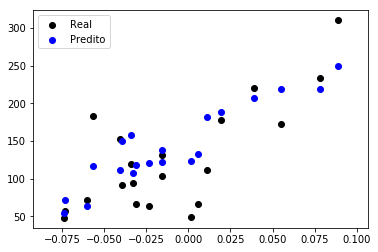

In [19]:
#plota todos os valores de validação de bmi
plt.scatter(X_v["bmi"], y_v,  color='black')
plt.scatter(X_v["bmi"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

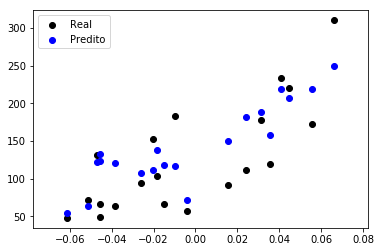

In [20]:
#plota todos os valores de validação de s5
plt.scatter(X_v["s5"], y_v,  color='black')
plt.scatter(X_v["s5"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

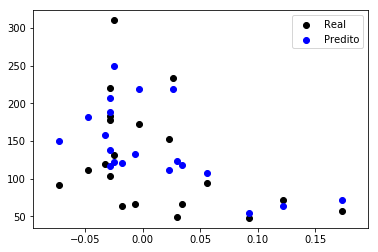

In [21]:
#plota todos os valores de validação de s3
plt.scatter(X_v["s3"], y_v,  color='black')
plt.scatter(X_v["s3"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

In [22]:
#Vetor de validação
print(y_v)

422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Progressão, dtype: float64


In [23]:
#Vetor de predição
for i in range (0,20):
    print(y_pred[i])

219.11502302996416
150.58640311126427
182.09797989468998
111.79030924170631
157.2633788006542
132.50378537332597
249.7545159730899
107.05849503010063
117.24026332748784
118.71371586703613
218.87498947886638
63.44637248997847
122.78367110062557
120.24341382590384
54.87078756608065
187.94430399074452
138.3456607947723
121.70630337470715
207.48323898840266
71.6624399907303


In [24]:
#Erro médio:
erro = 0
N = 20 #Número de linhas
for i in range (0,20):
    erro = erro + ((y_v[422+i] - y_pred[i])**2)
erro = erro**0.5/N
print(erro)

9.948099017654151
